In [2]:
import tensorflow as tf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from tensorflow.examples.tutorials.mnist import input_data



We will try to work with the Modified National Institute of Standards and Technology

We can use the following code to get data from tensorflow

In [3]:
usingTensorData = False
if usingTensorData:
    mnist = input_data.read_data_sets("/tmp/data/", one_hot=True)

    # Load data
    X_train = mnist.train.images
    Y_train = mnist.train.labels
    X_test = mnist.test.images
    Y_test = mnist.test.labels
    

Or you can download the data set from [Kaggle](https://www.kaggle.com/c/digit-recognizer/data) and put it in your projects folder which I recommend so you'll get to use pandas as np more :D

In [4]:
usingOurOwnData = True
if(usingOurOwnData) :
    data = pd.read_csv('train.csv')

In [5]:
data.head()

label  pixel0  pixel1  pixel2  pixel3  pixel4  pixel5  pixel6  pixel7  \
0      1       0       0       0       0       0       0       0       0   
1      0       0       0       0       0       0       0       0       0   
2      1       0       0       0       0       0       0       0       0   
3      4       0       0       0       0       0       0       0       0   
4      0       0       0       0       0       0       0       0       0   

   pixel8    ...     pixel774  pixel775  pixel776  pixel777  pixel778  \
0       0    ...            0         0         0         0         0   
1       0    ...            0         0         0         0         0   
2       0    ...            0         0         0         0         0   
3       0    ...            0         0         0         0         0   
4       0    ...            0         0         0         0         0   

   pixel779  pixel780  pixel781  pixel782  pixel783  
0         0         0         0         0         0  
1         0         0         0         0         0  
2         0         0         0         0         0  
3         0         0         0         0         0  
4         0         0         0         0         0  

[5 rows x 785 columns]

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42000 entries, 0 to 41999
Columns: 785 entries, label to pixel783
dtypes: int64(785)
memory usage: 251.5 MB


In [7]:
npArr = data.as_matrix()

In [8]:
npArr.shape

(42000, 785)

In [9]:
labels = npArr[:,0]

In [10]:
labels.shape

(42000,)

In [11]:
images = npArr[:,1:]

In [12]:
images.shape

(42000, 784)

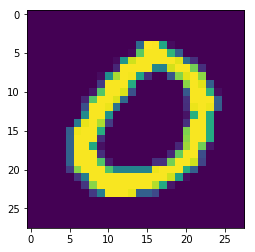

In [13]:
plt.imshow(images[54].reshape([28,28]))

In [14]:
print(labels[54])

0


In [15]:
labels = [np.eye(10)[i:i+1].reshape([10]) for i in labels]

In [16]:
labels[0:2]

[array([0., 1., 0., 0., 0., 0., 0., 0., 0., 0.]),
 array([1., 0., 0., 0., 0., 0., 0., 0., 0., 0.])]

In [17]:
labels = np.array(labels)

In [18]:
labels.shape

(42000, 10)

In [19]:
labels[54]

array([1., 0., 0., 0., 0., 0., 0., 0., 0., 0.])

In [20]:
images.shape

(42000, 784)

In [21]:
labels.shape

(42000, 10)

now lets make do some actual coding :D <br>
(pay attention to the initializer and name and dtype (because it can not always store the same amount of number as in python) and shape)

In [22]:
def getVariables(firstTime = True):
    with tf.variable_scope("Net",reuse= not firstTime):
        weights1 = tf.get_variable(name="weight1", dtype=tf.float32, shape=[784,10], initializer=tf.truncated_normal_initializer())
        bias1 = tf.get_variable(name="bias1", dtype=tf.float32, shape=[10], initializer=tf.zeros_initializer())
        return weights1, bias1

In [23]:
weights1, bias1 = getVariables()

In [24]:
weAreCareful = True 
if weAreCareful :
    weights1, bias1 = getVariables(False)
else :
    weights1, bias1 = getVariables(True)

Note that I don't use initializer :D

In [25]:
def getPlaceHolders():
    imagesPlaceHolder = tf.placeholder(name="imageHolder", dtype=tf.float32, shape=[None,784])
    labelsPlaceHolder = tf.placeholder(name="labelHolder", dtype=tf.float32, shape=[None,10])
    return imagesPlaceHolder, labelsPlaceHolder

In [26]:
imagesPlaceHolder, lablesPlaceHolder = getPlaceHolders()

In [27]:
imagesPlaceHolder, lablesPlaceHolder = getPlaceHolders()
# we didn't get any kind of error :D

In [52]:
def getOutPut(weights1In, bias1In, imagesPlaceHolderIn, lablesPlaceHolderIn):
    outPutMat = tf.matmul(imagesPlaceHolderIn, weights1In)
    outPut = tf.add(outPutMat, bias1In)
    return outPut

In [53]:
outPut = getOutPut(weights1, bias1, imagesPlaceHolder, lablesPlaceHolder)

In [54]:
outPut.shape

TensorShape([Dimension(None), Dimension(10)])

In [55]:
def getLoss(labelsIn ,outPutIn):
    return tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits_v2(labels = labelsIn, logits=outPutIn))

In [62]:
loss = getLoss(lablesPlaceHolder, outPut)

In [63]:
loss.shape

TensorShape([])

In [64]:
def getAccuracy(realOut, realPred):
    res = 0
    for i in range(realOut.shape[0]):
        if(realOut[i].argmax() == realPred[i].argmax()):
            res += 1
    return res / realOut.shape[0]

In [65]:
print(getAccuracy(labels, labels))

1.0


Try not to use more than 32 for minibatch :<br>
Training with large minibatches is bad for your health.<br>
More importantly, it's bad for your test error.<br>
Friends dont let friends use minibatches larger than 32 <br>
[Yann LeCun](https://twitter.com/ylecun/status/989610208497360896?lang=en)<br>
[Paper](https://arxiv.org/abs/1804.07612)


In [80]:
def train(imagesIn, labelsIn, weights1In, bias1In, imagesPlaceHolderIn, lablesPlaceHolderIn, outPutIn, lossIn, lr = 1e-3, epochs = 100, useMiniBatch = False, miniBatches = 16):
    if not (useMiniBatch):
        miniBatches = imagesIn.shape[0]
        
    trainer = tf.train.AdamOptimizer(learning_rate=lr).minimize(lossIn, var_list=tf.trainable_variables())
    init = tf.global_variables_initializer()
    
    with tf.Session() as sess :
        
        sess.run(init)
        
        feed_dict = {imagesPlaceHolder : imagesIn, lablesPlaceHolder : labelsIn}
        print("loss is %f " % sess.run(loss,feed_dict=feed_dict))
        print("accuracy is %f " % getAccuracy(labelsIn, sess.run(outPut,feed_dict=feed_dict)))
        
        for j in range(epochs):
            
            for i in range(int(imagesIn.shape[0]/miniBatches)+1):
                start = i*miniBatches
                end = (i+1)*miniBatches

                if(i==int(imagesIn.shape[0]/miniBatches)):
                    end = imagesIn.shape[0]

                x = imagesIn[start:end]
                y = labelsIn[start:end]
                
                feed_dict = {imagesPlaceHolderIn : x, lablesPlaceHolderIn : y}
                sess.run(trainer,feed_dict=feed_dict)
            
        
        feed_dict = {imagesPlaceHolder : imagesIn, lablesPlaceHolder : labelsIn}
        print("loss is %f " % sess.run(loss,feed_dict=feed_dict))
        print("accuracy is %f " % getAccuracy(labelsIn, sess.run(outPut,feed_dict=feed_dict)))
        
        
    

In [81]:
train(images[:2000], labels[:2000], weights1, bias1, imagesPlaceHolder, lablesPlaceHolder, outPut, loss, useMiniBatch=True)

loss is 2630.550781 
accuracy is 0.090500 
loss is 2.889621 
accuracy is 0.973500 
